# Import libraries numpy, panda, matplotlib, seaborn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv("C:/Users/user/Downloads/Spotify_data.csv")

## View the first few rows

In [10]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022/02/17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022/02/17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022/02/17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022/02/17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022/02/17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


# 1. Number of files submitted for the month of March

### Change the date format first

In [11]:
df['added'] = pd.to_datetime(df['added'])

### View few cells to confirm date format change

In [12]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022-02-17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022-02-17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022-02-17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022-02-17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022-02-17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [15]:
march_submissions = df[df['added'].dt.month == 3].shape[0]
print(f"Number of files submitted in March: {march_submissions}")

Number of files submitted in March: 3


# 2. Maximum Duration for Each Year


### Group by column year released then find the maximum duratrion

In [21]:
max_duration_per_year = df.groupby('year released')['dur'].max()
print (max_duration_per_year)

year released
1975    354
2009    321
2010    308
2011    337
2012    350
2013    688
2014    323
2015    296
2016    348
2017    343
2018    418
2019    302
2020    240
2021    280
Name: dur, dtype: int64


# 3. Number of Songs Released Per Artist for All Years
### Group by artists & count the songs

In [23]:
songs_per_artist = df['artist'].value_counts()
print(songs_per_artist)

artist
Taylor Swift          21
Drake                 18
Calvin Harris         18
Rihanna               14
Ariana Grande         14
                      ..
Stormzy                1
Tyler, The Creator     1
Wiley                  1
Young T & Bugsey       1
Young Thug             1
Name: count, Length: 444, dtype: int64


# 4. Number of Songs Released Per Artist in 2010
### Filter by 2010 & count the songs per artist

In [25]:
songs_per_artist_2010 = df[df['year released'] == 2010]['artist'].value_counts()
print(songs_per_artist_2010)

artist
Kesha                   6
Bruno Mars              5
Rihanna                 5
Usher                   4
Jason Derulo            3
B.o.B                   3
Eminem                  2
Ellie Goulding          2
Edward Maya             2
Drake                   2
Maroon 5                2
Katy Perry              2
Enrique Iglesias        2
Far East Movement       2
Taylor Swift            2
Taio Cruz               2
Black Eyed Peas         2
Ludacris                2
Tinie Tempah            2
Waka Flocka Flame       2
Swedish House Mafia     2
The Band Perry          2
3OH!3                   1
DJ Khaled               1
CeeLo Green             1
Aloe Blacc              1
Mike Posner             1
Lil Wayne               1
Justin Bieber           1
INNA                    1
Eliza Doolittle         1
Example                 1
Flo Rida                1
Duck Sauce              1
Sugarland               1
Stromae                 1
Sara Bareilles          1
Robyn                   1
Plan 

# 5. Number of Songs Released Per Top Genre in Each Year
### Group by genre and year, then count songs


In [28]:
songs_per_genre_year = df.groupby(['year released','top genre']).size().unstack(fill_value=0)
print(songs_per_genre_year)

top genre      acoustic pop  adult standards  afro dancehall  afrofuturism  \
year released                                                                
1975                      0                0               0             0   
2009                      0                0               0             0   
2010                      1                0               0             0   
2011                      0                0               0             0   
2012                      0                0               0             0   
2013                      0                1               0             0   
2014                      0                0               0             0   
2015                      0                0               0             0   
2016                      0                0               0             0   
2017                      0                0               0             0   
2018                      0                0               0    

# Plot diagram showing the number of songs added by month & year
### Extract year & month

In [29]:
df['year_month'] = df['added'].dt.to_period('M')

### Count songs per month-year


In [30]:
monthly_song_counts = df['year_month'].value_counts().sort_index()

### Plot the data

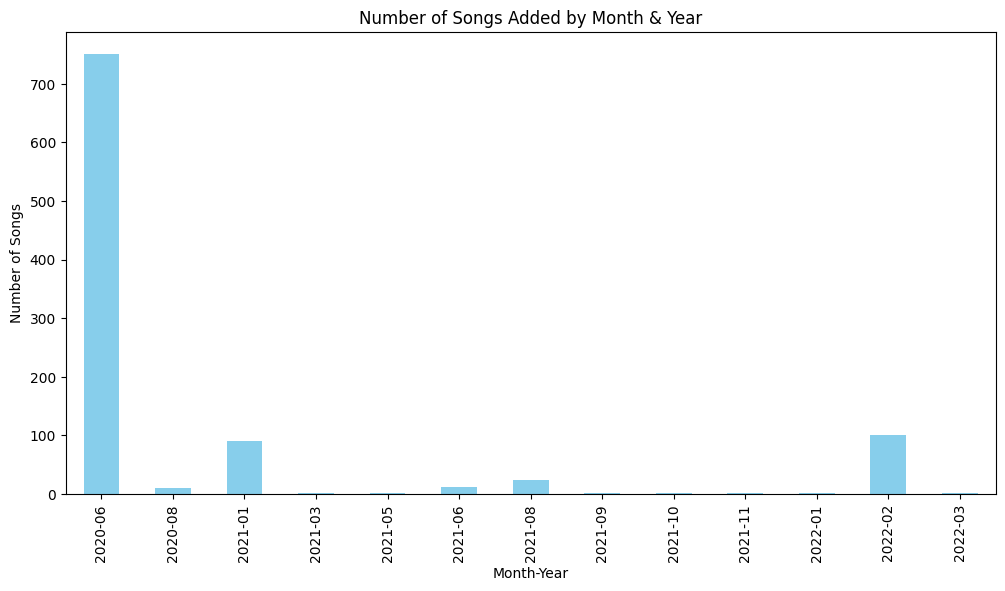

In [31]:
plt.figure(figsize=(12, 6))
monthly_song_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Songs Added by Month & Year")
plt.xlabel("Month-Year")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90)
plt.show()

# Line graph diagram showing the number of songs added by top genre for all years

In [35]:
genre_trends = df.groupby(['year released','top genre']).size().unstack(fill_value=0)
